<a href="https://colab.research.google.com/github/Patrick-Munyao/Autolib-Electric-Cars/blob/main/Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis Testing [Electric Car Usage]


## Importing Libraries 

In [193]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

# Loading the dataset

In [194]:
ecar_df = pd.read_csv('https://bit.ly/DSCoreAutolibDataset')
ecar_df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [195]:
# Review the data tail
ecar_df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [196]:
ecar_df.shape

(16085, 13)

In [197]:
# Getting information about the data
ecar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [198]:
# Verifying data types for each column
ecar_df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

## Data Cleaning 

In [199]:
# Checking if data contains null values and their sum
ecar_df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [200]:
# Check for duplicates
ecar_df.duplicated().sum()

0

In [201]:
# Review unique entries 
ecar_df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [202]:
# Renaming the column names to remove inconsistencies 
dict= {'Postal code': 'postal_code', 'dayOfWeek': 'day_of_week'}
ecar_df.rename(columns =dict, inplace=True)
ecar_df.head()


,postal_code,date,n_daily_data_points,day_of_week,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [203]:
# Normalizing all columns to lower case
ecar_df.columns= ecar_df.columns.str.lower()
ecar_df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'day_of_week', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [204]:
# Getting the data description

ecar_df.describe()

,postal_code,n_daily_data_points,day_of_week,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


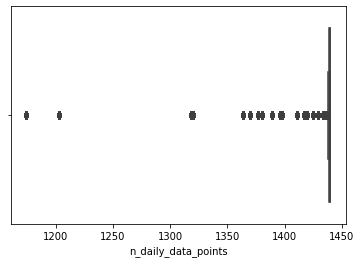

In [205]:
# Checking for outliers
# n_daily_data_points
print(sns.boxplot(ecar_df['n_daily_data_points']))

AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


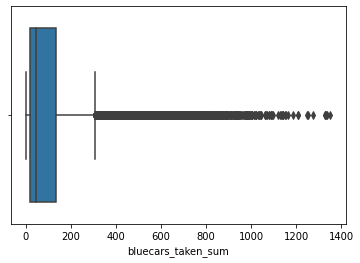

In [206]:
# bluecars_taken_sum
print(sns.boxplot(ecar_df['bluecars_taken_sum']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


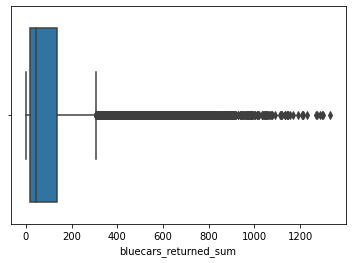

In [207]:
# bluecars_returned_sum
print(sns.boxplot(ecar_df['bluecars_returned_sum']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


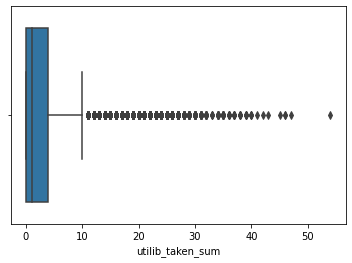

In [208]:
# utilib_taken_sum
print(sns.boxplot(ecar_df['utilib_taken_sum']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


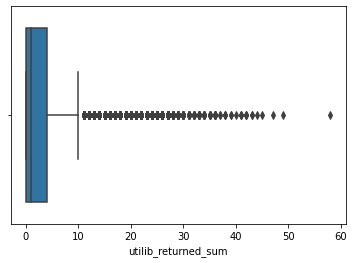

In [209]:
# utilib_returned_sum
print(sns.boxplot(ecar_df['utilib_returned_sum']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


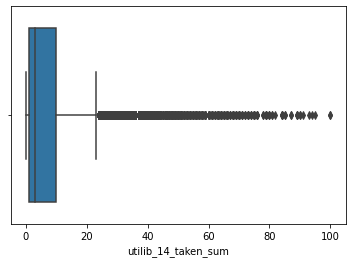

In [210]:
# utilib_14_taken_sum
print(sns.boxplot(ecar_df['utilib_14_taken_sum']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


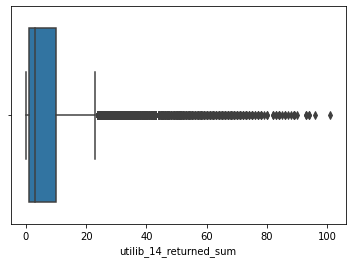

In [211]:
# utilib_14_returned_sum
print(sns.boxplot(ecar_df['utilib_14_returned_sum']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


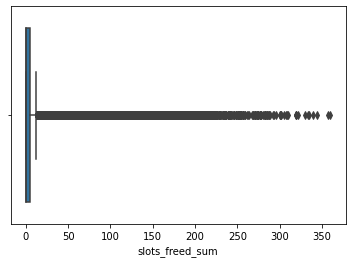

In [212]:
# slots_freed_sum
print(sns.boxplot(ecar_df['slots_freed_sum']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


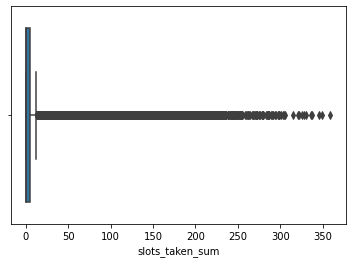

In [213]:
# slots_taken_sum
print(sns.boxplot(ecar_df['slots_taken_sum']))

In [214]:
# checking for anormalities

Q1 = ecar_df.quantile(0.25)
Q3 = ecar_df.quantile(0.75)

IQR = Q3 - Q1
IQR

postal_code               2070.0
n_daily_data_points          1.0
day_of_week                  4.0
bluecars_taken_sum         115.0
bluecars_returned_sum      115.0
utilib_taken_sum             4.0
utilib_returned_sum          4.0
utilib_14_taken_sum          9.0
utilib_14_returned_sum       9.0
slots_freed_sum              5.0
slots_taken_sum              5.0
dtype: float64

# Exploratory Data Analysis

## Univariate Analysis

### Measures of Central Tendency - before removing Outliers

In [215]:
ecar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   postal_code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   day_of_week             16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   bluecars_taken_sum      16085 non-null  int64 
 6   bluecars_returned_sum   16085 non-null  int64 
 7   utilib_taken_sum        16085 non-null  int64 
 8   utilib_returned_sum     16085 non-null  int64 
 9   utilib_14_taken_sum     16085 non-null  int64 
 10  utilib_14_returned_sum  16085 non-null  int64 
 11  slots_freed_sum         16085 non-null  int64 
 12  slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [216]:
# Calculating the mean of the dataset

ecar_df[{'n_daily_data_points', 'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
            'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'}].mean()

utilib_returned_sum          3.699099
bluecars_returned_sum      125.912714
utilib_14_taken_sum          8.600560
slots_taken_sum             22.629282
bluecars_taken_sum         125.926951
slots_freed_sum             22.629033
utilib_14_returned_sum       8.599192
utilib_taken_sum             3.698290
n_daily_data_points       1431.330619
dtype: float64

In [217]:
# Calculating the mode of the dataset

ecar_df[{'n_daily_data_points', 'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
            'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'}].mode()

,utilib_returned_sum,bluecars_returned_sum,utilib_14_taken_sum,slots_taken_sum,bluecars_taken_sum,slots_freed_sum,utilib_14_returned_sum,utilib_taken_sum,n_daily_data_points
0,0,13,0,0,12,0,0,0,1440


In [218]:
# Calculating the median of the dataset

ecar_df[{'n_daily_data_points', 'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
            'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'}].median()

utilib_returned_sum          1.0
bluecars_returned_sum       46.0
utilib_14_taken_sum          3.0
slots_taken_sum              0.0
bluecars_taken_sum          46.0
slots_freed_sum              0.0
utilib_14_returned_sum       3.0
utilib_taken_sum             1.0
n_daily_data_points       1440.0
dtype: float64

### Measures of Dispersion before removing Outliers

In [219]:
# Calculating the variance of the dataset

ecar_df[{'n_daily_data_points', 'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
            'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'}].var()

utilib_returned_sum          33.926364
bluecars_returned_sum     34410.819414
utilib_14_taken_sum         165.639430
slots_taken_sum            2719.208431
bluecars_taken_sum        34383.016113
slots_freed_sum            2716.521850
utilib_14_returned_sum      165.610979
utilib_taken_sum             33.814897
n_daily_data_points        1103.040274
dtype: float64

In [220]:
# Calculating the standard deviation of the dataset

ecar_df[{'n_daily_data_points', 'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
            'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'}].std()

utilib_returned_sum         5.824634
bluecars_returned_sum     185.501535
utilib_14_taken_sum        12.870098
slots_taken_sum            52.146030
bluecars_taken_sum        185.426579
slots_freed_sum            52.120263
utilib_14_returned_sum     12.868993
utilib_taken_sum            5.815058
n_daily_data_points        33.212050
dtype: float64

In [221]:
# Calculating the quantiles of the dataset

ecar_df[{'n_daily_data_points', 'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
            'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'}].quantile([0.25,0.5,0.75])

,utilib_returned_sum,bluecars_returned_sum,utilib_14_taken_sum,slots_taken_sum,bluecars_taken_sum,slots_freed_sum,utilib_14_returned_sum,utilib_taken_sum,n_daily_data_points
0.25,0.0,20.0,1.0,0.0,20.0,0.0,1.0,0.0,1439.0
0.50,1.0,46.0,3.0,0.0,46.0,0.0,3.0,1.0,1440.0
0.75,4.0,135.0,10.0,5.0,135.0,5.0,10.0,4.0,1440.0


In [222]:
# Skewness of dataset
ecar_df[{'n_daily_data_points', 'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
            'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'}].skew()

utilib_returned_sum       2.578665
bluecars_returned_sum     2.412085
utilib_14_taken_sum       2.510924
slots_taken_sum           2.596904
bluecars_taken_sum        2.406355
slots_freed_sum           2.597406
utilib_14_returned_sum    2.511488
utilib_taken_sum          2.556872
n_daily_data_points      -5.742776
dtype: float64

In [223]:
# Kurtosis of the dataset
ecar_df[{'n_daily_data_points', 'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
            'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'}].kurt()

utilib_returned_sum        7.936357
bluecars_returned_sum      6.186288
utilib_14_taken_sum        7.186815
slots_taken_sum            6.442553
bluecars_taken_sum         6.172692
slots_freed_sum            6.454514
utilib_14_returned_sum     7.185463
utilib_taken_sum           7.702362
n_daily_data_points       36.594846
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

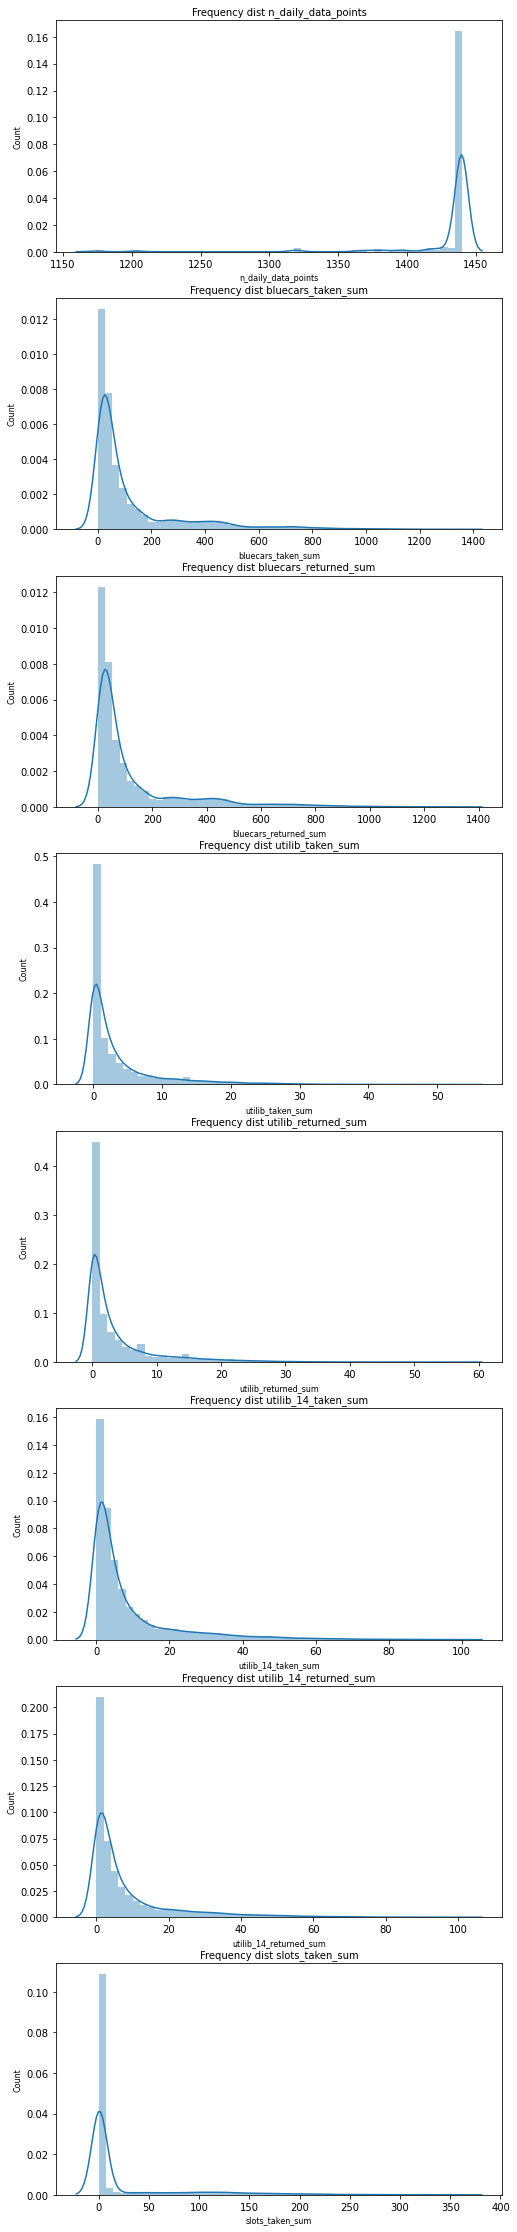

In [224]:
# Visualizing the variabes
col_names = ['n_daily_data_points', 'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
             'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum','slots_taken_sum']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.distplot(ecar_df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()



> The distribution of all the plotted variables is positively skewed



In [225]:
# Removing outliers
ecar_df1 =ecar_df[~((ecar_df < (Q1 - 1.5 * IQR)) |(ecar_df > (Q3 + 1.5 * IQR))).any(axis=1)]
ecar_df1.head()

,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
3899,91330,1/1/2018,1440,0,weekday,19,9,0,0,0,0,4,2
3900,91330,1/2/2018,1438,1,weekday,10,10,0,0,0,0,0,0
3901,91330,1/3/2018,1439,2,weekday,11,13,0,0,0,0,1,1
3903,91330,1/5/2018,1440,4,weekday,10,6,0,0,0,0,1,1
3905,91330,1/7/2018,1440,6,weekend,28,17,0,0,1,1,4,2


In [226]:
ecar_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9783 entries, 3899 to 16083
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   postal_code             9783 non-null   int64 
 1   date                    9783 non-null   object
 2   n_daily_data_points     9783 non-null   int64 
 3   day_of_week             9783 non-null   int64 
 4   day_type                9783 non-null   object
 5   bluecars_taken_sum      9783 non-null   int64 
 6   bluecars_returned_sum   9783 non-null   int64 
 7   utilib_taken_sum        9783 non-null   int64 
 8   utilib_returned_sum     9783 non-null   int64 
 9   utilib_14_taken_sum     9783 non-null   int64 
 10  utilib_14_returned_sum  9783 non-null   int64 
 11  slots_freed_sum         9783 non-null   int64 
 12  slots_taken_sum         9783 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 1.0+ MB


### Measures of central tendency - after removing outliers

In [227]:
# Mean
ecar_df1[{'n_daily_data_points', 'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
            'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'}].mean()    

utilib_returned_sum          1.494327
bluecars_returned_sum       49.222324
utilib_14_taken_sum          3.567106
slots_taken_sum              0.694981
bluecars_taken_sum          49.242870
slots_freed_sum              0.697434
utilib_14_returned_sum       3.568231
utilib_taken_sum             1.498518
n_daily_data_points       1439.698457
dtype: float64

In [228]:
# Mode
ecar_df1[{'n_daily_data_points', 'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
            'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'}].mode() 

,utilib_returned_sum,bluecars_returned_sum,utilib_14_taken_sum,slots_taken_sum,bluecars_taken_sum,slots_freed_sum,utilib_14_returned_sum,utilib_taken_sum,n_daily_data_points
0,0,13,0,0,12,0,0,0,1440


In [229]:
# Median
ecar_df1[{'n_daily_data_points', 'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
            'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'}].median() 

utilib_returned_sum          1.0
bluecars_returned_sum       34.0
utilib_14_taken_sum          2.0
slots_taken_sum              0.0
bluecars_taken_sum          34.0
slots_freed_sum              0.0
utilib_14_returned_sum       2.0
utilib_taken_sum             1.0
n_daily_data_points       1440.0
dtype: float64

### Measures of Dispersion - after removing outliers

In [230]:
# Variance
ecar_df1[{'n_daily_data_points', 'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
            'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'}].var()


utilib_returned_sum          3.578760
bluecars_returned_sum     2136.643165
utilib_14_taken_sum         15.172735
slots_taken_sum              3.344288
bluecars_taken_sum        2144.041396
slots_freed_sum              3.361317
utilib_14_returned_sum      15.197118
utilib_taken_sum             3.645444
n_daily_data_points          0.319203
dtype: float64

In [231]:
# Standard deviation 
ecar_df1[{'n_daily_data_points', 'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
            'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'}].std()

utilib_returned_sum        1.891761
bluecars_returned_sum     46.223838
utilib_14_taken_sum        3.895220
slots_taken_sum            1.828739
bluecars_taken_sum        46.303795
slots_freed_sum            1.833390
utilib_14_returned_sum     3.898348
utilib_taken_sum           1.909304
n_daily_data_points        0.564981
dtype: float64

In [232]:
# Skewness
ecar_df1[{'n_daily_data_points', 'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
            'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'}].skew()

utilib_returned_sum       1.653366
bluecars_returned_sum     1.797422
utilib_14_taken_sum       1.621941
slots_taken_sum           3.168595
bluecars_taken_sum        1.791195
slots_freed_sum           3.179883
utilib_14_returned_sum    1.634047
utilib_taken_sum          1.652089
n_daily_data_points      -1.725347
dtype: float64

In [233]:
# Kurtosis
ecar_df1[{'n_daily_data_points', 'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
            'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'}].kurt()

utilib_returned_sum        2.726885
bluecars_returned_sum      3.918840
utilib_14_taken_sum        2.847781
slots_taken_sum           10.570743
bluecars_taken_sum         3.910795
slots_freed_sum           10.723702
utilib_14_returned_sum     2.897357
utilib_taken_sum           2.685229
n_daily_data_points        1.947547
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

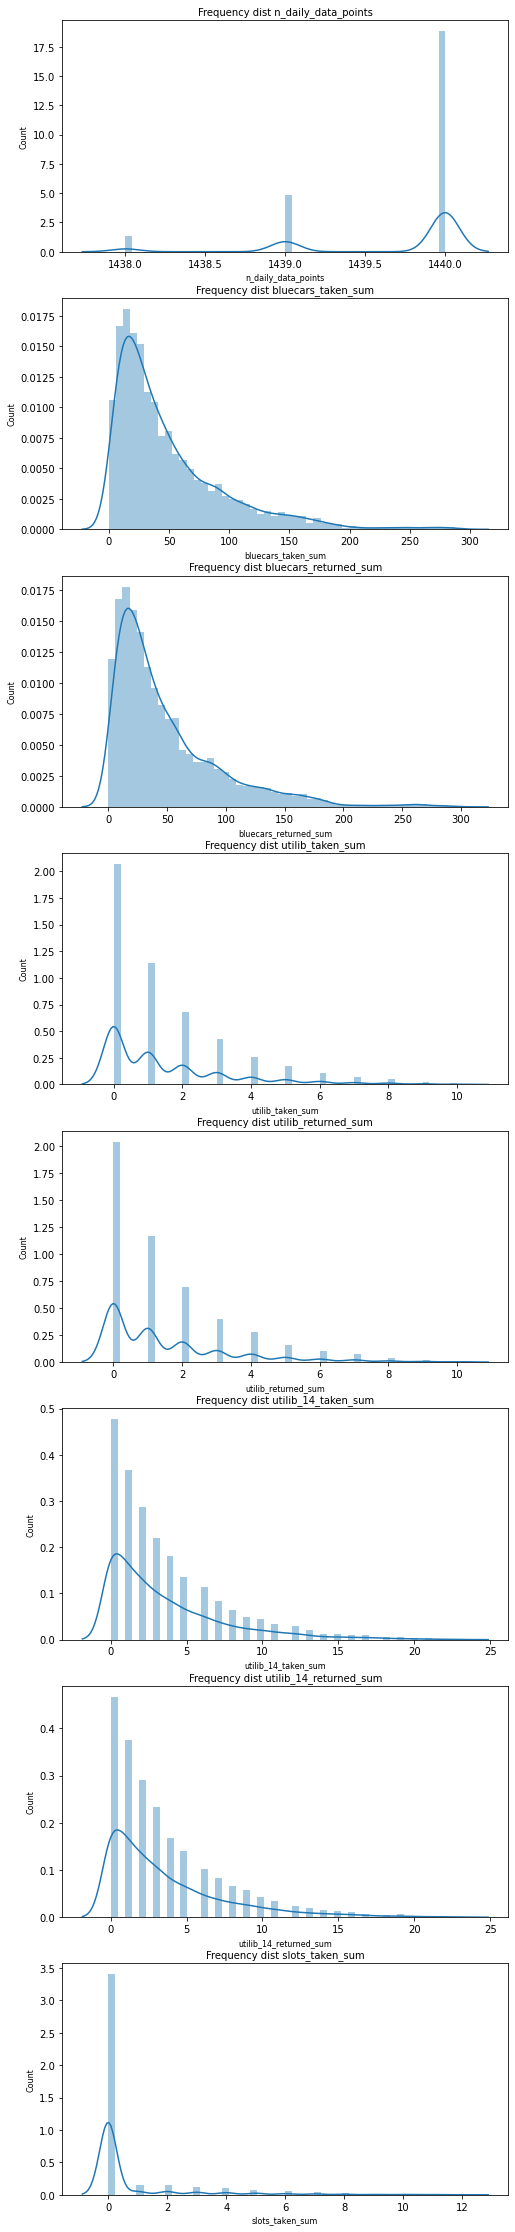

In [234]:
# Visualizing the variabes after removing outliers
col_names = ['n_daily_data_points', 'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
             'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum','slots_taken_sum']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.distplot(ecar_df1[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()



>  The distribution of all the plotted variables is positively skewed, even after removing the outliers



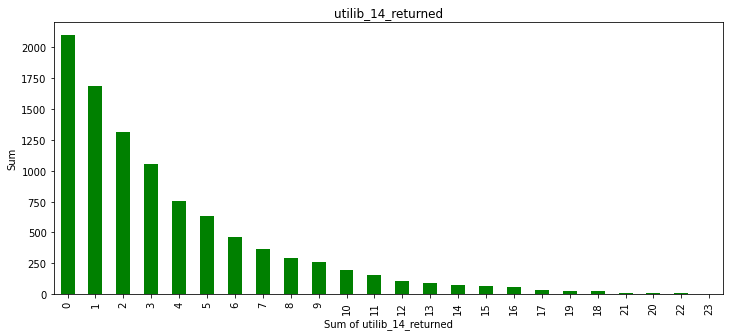

In [235]:
# Test for above distribution - Bar
ecar_df1['utilib_14_returned_sum'].value_counts().plot(kind='bar', color='green', figsize=(12,5))
plt.xlabel('Sum of utilib_14_returned')
plt.ylabel('Sum')
plt.title('utilib_14_returned')
plt.show()

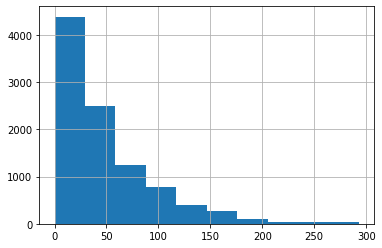

In [236]:
# Histogram
ecar_df1['bluecars_taken_sum'].hist()


In [237]:
# Count of day types
ecar_df1['day_type'].value_counts()

weekday    6820
weekend    2963
Name: day_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


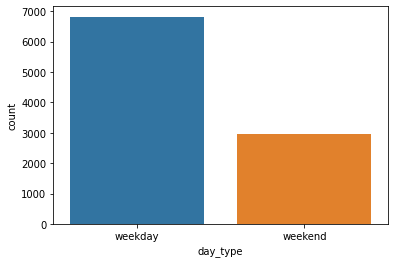

In [238]:
# Plotting the day type count
sns.countplot(ecar_df1.day_type)

# Bivariate Analysis

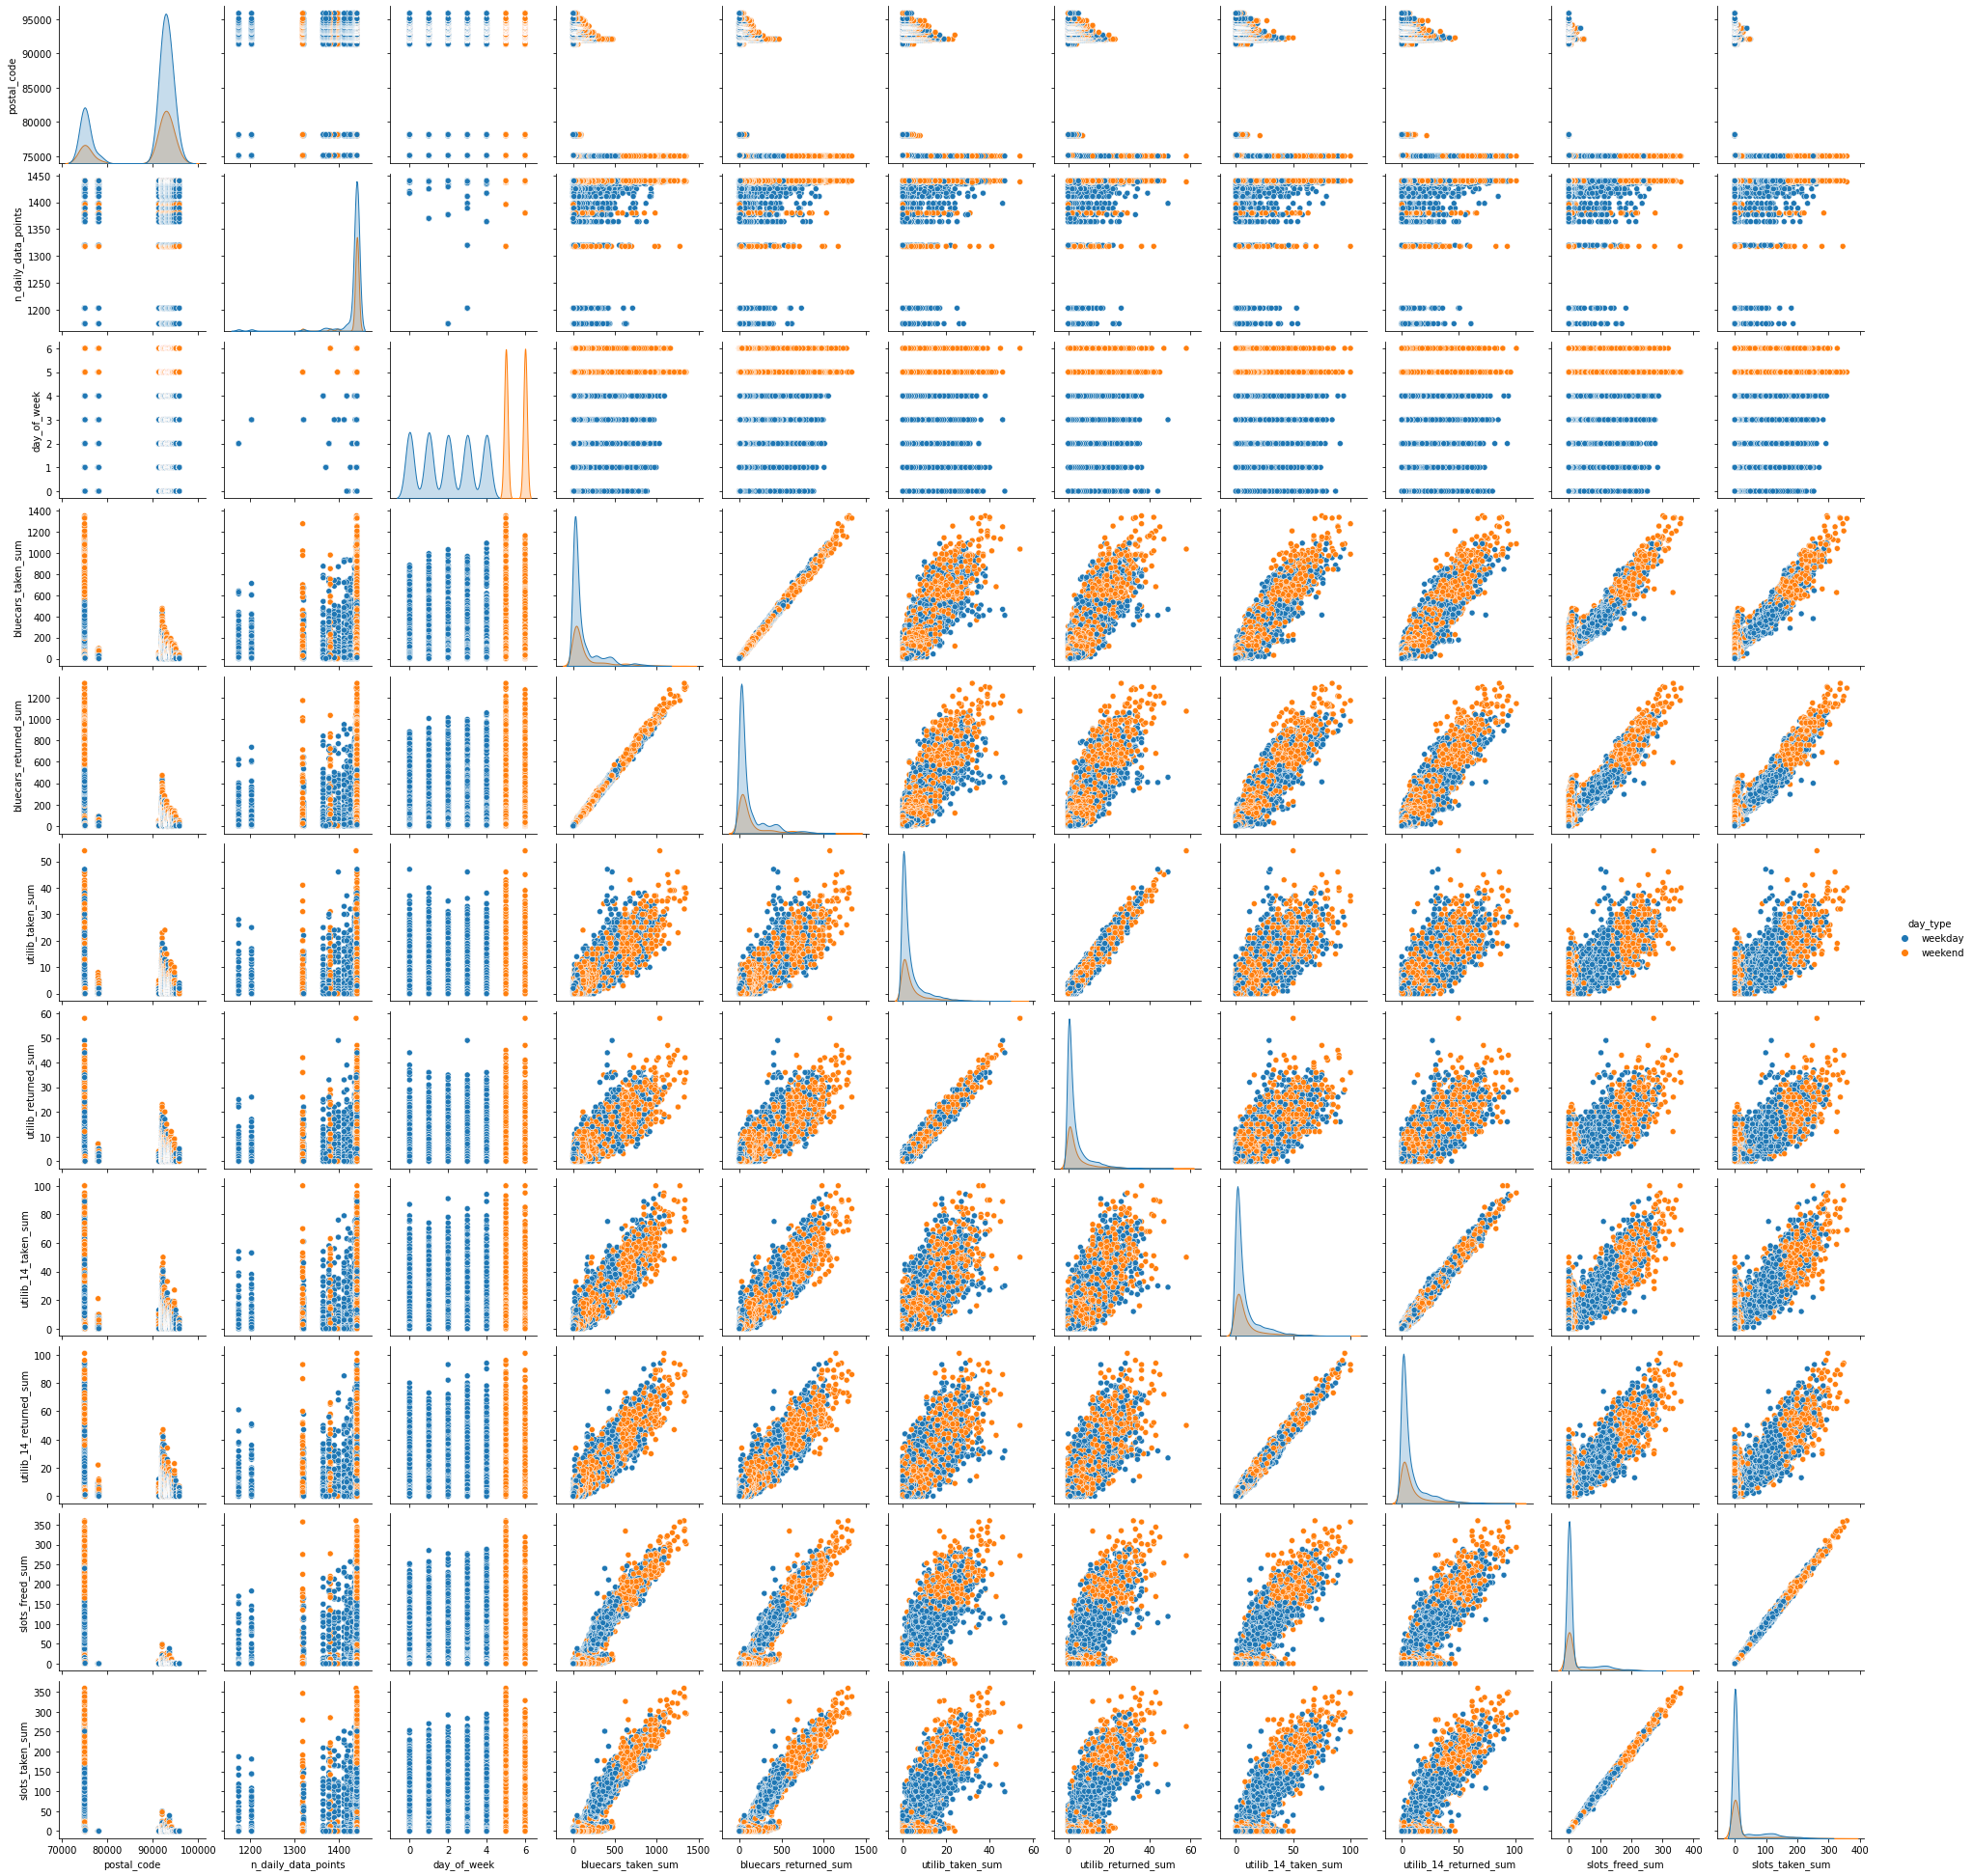

In [239]:
# Visualization of relationship between/among variables - Scatter plot
sns.pairplot(ecar_df, hue='day_type')



> There is a strong positive correlation between several data variables



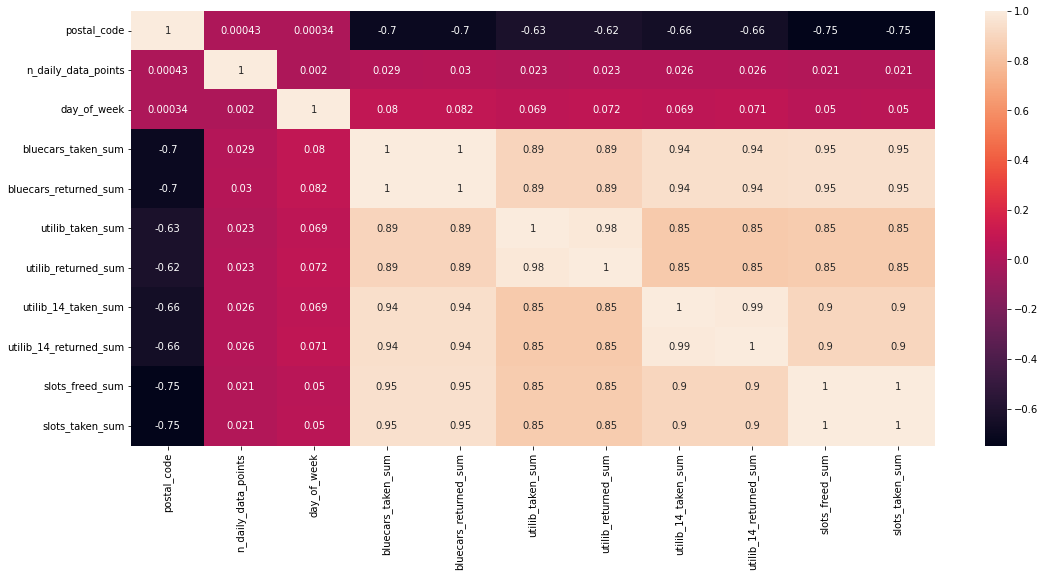

In [240]:
# Plotting the correlations with a heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(ecar_df.corr(),annot=True)
plt.show()

In [241]:
# The correlation (Pearson) coeficcients on a data table
ecar_df.corr()

,postal_code,n_daily_data_points,day_of_week,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
postal_code,1.000000,0.000432,0.000343,-0.698020,-0.697519,-0.625521,-0.624786,-0.656744,-0.656516,-0.749528,-0.749157
n_daily_data_points,0.000432,1.000000,0.002039,0.029411,0.030063,0.022669,0.023322,0.025738,0.026351,0.020873,0.021169
day_of_week,0.000343,0.002039,1.000000,0.079649,0.081954,0.069295,0.071713,0.068790,0.071279,0.049960,0.050468
bluecars_taken_sum,-0.698020,0.029411,0.079649,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
bluecars_returned_sum,-0.697519,0.030063,0.081954,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
utilib_taken_sum,-0.625521,0.022669,0.069295,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
utilib_returned_sum,-0.624786,0.023322,0.071713,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
utilib_14_taken_sum,-0.656744,0.025738,0.068790,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
utilib_14_returned_sum,-0.656516,0.026351,0.071279,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
slots_freed_sum,-0.749528,0.020873,0.049960,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221


# Sampling

In [242]:
ecar_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9783 entries, 3899 to 16083
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   postal_code             9783 non-null   int64 
 1   date                    9783 non-null   object
 2   n_daily_data_points     9783 non-null   int64 
 3   day_of_week             9783 non-null   int64 
 4   day_type                9783 non-null   object
 5   bluecars_taken_sum      9783 non-null   int64 
 6   bluecars_returned_sum   9783 non-null   int64 
 7   utilib_taken_sum        9783 non-null   int64 
 8   utilib_returned_sum     9783 non-null   int64 
 9   utilib_14_taken_sum     9783 non-null   int64 
 10  utilib_14_returned_sum  9783 non-null   int64 
 11  slots_freed_sum         9783 non-null   int64 
 12  slots_taken_sum         9783 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 1.4+ MB


In [243]:
ecar_df1.shape

(9783, 13)



>  The dataset has 16085 rows and 13 columns. For ease of hypothesis, we shall select and use a sample of 2000 rows and 13 columns. 



In [244]:
df_def = ecar_df1[ecar_df1['day_type'] == 'weekday']
df_def

,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
3899,91330,1/1/2018,1440,0,weekday,19,9,0,0,0,0,4,2
3900,91330,1/2/2018,1438,1,weekday,10,10,0,0,0,0,0,0
3901,91330,1/3/2018,1439,2,weekday,11,13,0,0,0,0,1,1
3903,91330,1/5/2018,1440,4,weekday,10,6,0,0,0,0,1,1
3906,91330,1/8/2018,1438,0,weekday,3,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16077,95880,6/12/2018,1439,1,weekday,25,25,0,0,0,0,0,0
16078,95880,6/13/2018,1440,2,weekday,12,13,0,0,1,1,0,0
16079,95880,6/14/2018,1439,3,weekday,15,13,0,0,0,0,0,0
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0


In [245]:
df_sample = df_def.sample(n=2000).reset_index()
df_sample.head()

,index,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,7657,92320,1/17/2018,1440,2,weekday,64,72,2,2,5,5,0,0
1,7625,92310,6/4/2018,1440,0,weekday,41,53,2,2,2,1,0,0
2,6467,92230,3/19/2018,1440,0,weekday,52,48,2,4,5,5,1,1
3,6788,92250,3/28/2018,1440,2,weekday,73,73,2,3,7,8,3,3
4,13760,94140,1/15/2018,1440,0,weekday,43,43,1,2,4,4,0,0


In [246]:
df_sample.n_daily_data_points.value_counts()

1440    1401
1439     487
1438     112
Name: n_daily_data_points, dtype: int64

In [247]:
df_datapoints = df_sample[df_sample['n_daily_data_points'] == 1439]
df_datapoints

,index,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
10,6006,92200,3/26/2018,1439,0,weekday,52,50,0,0,23,23,0,0
15,13575,94120,6/5/2018,1439,1,weekday,40,44,0,2,0,0,0,0
16,4821,92110,6/7/2018,1439,3,weekday,31,28,2,3,1,1,0,0
22,9899,92800,4/2/2018,1439,0,weekday,83,88,2,3,7,7,10,11
30,4714,92110,2/6/2018,1439,1,weekday,20,26,1,0,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,11625,93350,5/29/2018,1439,1,weekday,18,14,1,1,1,2,0,0
1988,5607,92160,6/14/2018,1439,3,weekday,26,26,0,1,2,0,0,0
1991,11947,93370,6/14/2018,1439,3,weekday,2,2,1,0,0,0,0,0
1993,15639,95100,1/23/2018,1439,1,weekday,11,18,1,1,0,0,0,0


In [248]:
df_datapoints.shape

(487, 14)

## Null and Alternative Hypotheses 

1. 
* H0: There is no significant difference between the sum of blue cars taken and sum of blue cars returned when daily data points are 1439
* H1: There is a significant difference between the sum of blue cars taken and sum of blue cars returned when daily data points are 1439









### Basis for statistic choice


Difference between sum of blue cars taken and sum of blue cars returned when data points equal 1439
* We sort our data and get 487 observations. Thus, our sample is 487
* Since the data is much skewed, we use Mann-Whitney U test
* Significance level will be set at 0.05



### Normality Test

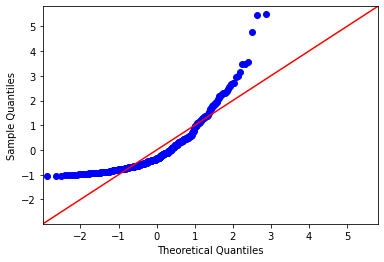

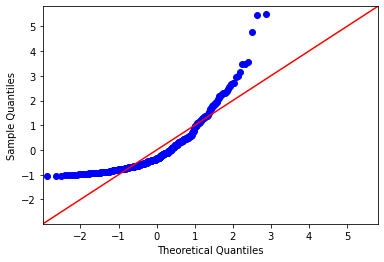

In [249]:
# Normality test using qq-plot for bluecars_taken_sum
import statsmodels.api as sm
import pylab
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

sm.qqplot(df_datapoints['bluecars_taken_sum'], fit = True, line= '45')



> In the avove resulting QQ plot, there are several points deviated from the diagonal line. The sample does not seem to conform with a Gaussian distribution.




In [250]:
# Checking the normality with Shapiro test
from scipy import stats
from scipy.stats import shapiro 
# interpreting
# alpha = 0.05
# if p > alpha, Gaussian dist observed, else, the data doesnt follow Gaussian dist
# Results (stat, p value)

stats.shapiro (df_datapoints['bluecars_taken_sum'])

# From the Shapiro test, p-value< 0.05 and therefore the sample does not seem Gaussian

(0.811311662197113, 1.9093507308435227e-23)

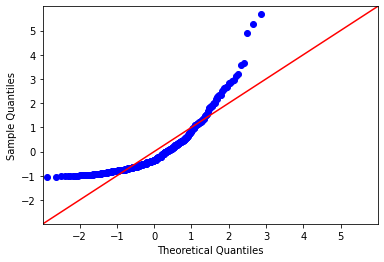

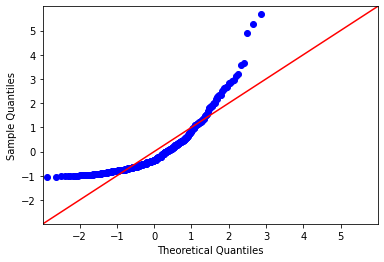

In [251]:
# Testing for normality (BlueCars_returned_sum)

sm.qqplot(df_datapoints['bluecars_returned_sum'], fit = True, line= '45')



> A number of data points lie outside the diagnol line, unlike in the case of normal distribution



In [252]:
# Shapiro test
stats.shapiro (df_datapoints['bluecars_returned_sum'])

# With p value being less than 0.05, then it follows that the sample is not drawn from a Gaussian distribution

(0.8101747035980225, 1.6525460561631418e-23)

### Correlation Test

In [253]:
# Bluecars_taken_sum vs bluecars_returned_sum
from scipy.stats import pearsonr
stat, p = pearsonr(df_datapoints['bluecars_taken_sum'], df_datapoints['bluecars_returned_sum'])
print('stat=%.3f, p=%.3f' %(stat, p))

# A p of zero implies that the variables are independent; they do not affect each other

stat=0.994, p=0.000


### Mann-Whitney U test

In [254]:
import scipy.stats as stats
# perform two-sided test. You can use 'greater' or 'less' for one-sided test
MannwhitneyuResult, pvalue = stats.mannwhitneyu(x=df_datapoints['bluecars_taken_sum'], y=df_datapoints['bluecars_returned_sum'], alternative = 'two-sided')
MannwhitneyuResult, pvalue

(117228.0, 0.7573706450633447)



> Since the p-value>0.05, we fail to reject the null hypothesis and conclude that there a significant difference between the sum of blue cars taken and sum of blue cars returned when daily data points are 1439



### Point Estimation 

In [255]:
# Mean difference between sample and population under study for blue cars

print (ecar_df1['bluecars_taken_sum'].mean())

print (df_datapoints['bluecars_taken_sum'].mean())
# calculate how much the estimated mean differs from the main mean

print ((ecar_df1['bluecars_taken_sum'].mean()) - (df_datapoints['bluecars_taken_sum'].mean()))

49.242870285188594
43.20739219712526
6.035478088063336




> From above, the population mean and sample mean are different. Our sample underestimates the population mean by 73.



### Confidence Level Around the parameter

In [256]:
# Finding the standard error of the mean of data 
#
import scipy.stats as stats
std_error = ecar_df1.std() / np.sqrt(2000)
std_error

postal_code               22.634282
n_daily_data_points        0.012633
day_of_week                0.046397
bluecars_taken_sum         1.035384
bluecars_returned_sum      1.033596
utilib_taken_sum           0.042693
utilib_returned_sum        0.042301
utilib_14_taken_sum        0.087100
utilib_14_returned_sum     0.087170
slots_freed_sum            0.040996
slots_taken_sum            0.040892
dtype: float64

In [257]:
# Margin_of_Error

Margin_of_Error = MannwhitneyuResult * std_error
print(Margin_of_Error)

postal_code               2.653372e+06
n_daily_data_points       1.480983e+03
day_of_week               5.439015e+03
bluecars_taken_sum        1.213760e+05
bluecars_returned_sum     1.211664e+05
utilib_taken_sum          5.004856e+03
utilib_returned_sum       4.958869e+03
utilib_14_taken_sum       1.021053e+04
utilib_14_returned_sum    1.021873e+04
slots_freed_sum           4.805860e+03
slots_taken_sum           4.793671e+03
dtype: float64


In [258]:
ecar_df1.mean()

postal_code               93104.755188
n_daily_data_points        1439.698457
day_of_week                   2.979454
bluecars_taken_sum           49.242870
bluecars_returned_sum        49.222324
utilib_taken_sum              1.498518
utilib_returned_sum           1.494327
utilib_14_taken_sum           3.567106
utilib_14_returned_sum        3.568231
slots_freed_sum               0.697434
slots_taken_sum               0.694981
dtype: float64

In [259]:
Lower_Bound = ecar_df1.mean() - Margin_of_Error
Upper_Bound = ecar_df1.mean() + Margin_of_Error
print(str(Lower_Bound) + ' lower bound ' + str(ecar_df1.mean()) + ' upper bound ' + str(Upper_Bound))

postal_code              -2.560267e+06
n_daily_data_points      -4.128445e+01
day_of_week              -5.436036e+03
bluecars_taken_sum       -1.213268e+05
bluecars_returned_sum    -1.211172e+05
utilib_taken_sum         -5.003357e+03
utilib_returned_sum      -4.957375e+03
utilib_14_taken_sum      -1.020696e+04
utilib_14_returned_sum   -1.021516e+04
slots_freed_sum          -4.805163e+03
slots_taken_sum          -4.792976e+03
dtype: float64 lower bound postal_code               93104.755188
n_daily_data_points        1439.698457
day_of_week                   2.979454
bluecars_taken_sum           49.242870
bluecars_returned_sum        49.222324
utilib_taken_sum              1.498518
utilib_returned_sum           1.494327
utilib_14_taken_sum           3.567106
utilib_14_returned_sum        3.568231
slots_freed_sum               0.697434
slots_taken_sum               0.694981
dtype: float64 upper bound postal_code               2.746476e+06
n_daily_data_points       2.920681e+03
day_of_wee



> Above is the confidence interval. It is within the lower and upper limits that the population is estimated to lie

